In [8]:
import pandas as pd
df = pd.read_excel("Delhi 2018 to 2024.xlsx")
df

C:\Users\Sahil Rafaliya\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Sparkline Group extension is not supported and will be removed
  for idx, row in parser.parse():


,Timestamp,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,AQI
0,2018-02-01 00:00:00,155.15,349.46,285.15,40.63,21.20,2.49,27.398,349.46
1,2018-02-02 00:00:00,181.08,328.07,169.29,42.98,12.70,1.69,34.390,328.07
2,2018-02-03 00:00:00,130.52,260.08,136.76,40.63,26.45,1.46,37.302,260.08
3,2018-02-04 00:00:00,151.06,264.22,116.13,38.58,21.05,1.33,2.280,264.22
4,2018-02-05 00:00:00,186.12,332.11,191.85,41.05,21.05,1.72,31.180,332.11
...,...,...,...,...,...,...,...,...,...
2521,27-12-2024 00:00,276.56,391.22,84.09,77.31,5.64,3.72,13.000,391.22
2522,28-12-2024 00:00,117.93,165.44,67.72,82.85,15.96,1.27,11.200,165.44
2523,29-12-2024 00:00,87.40,124.59,41.82,59.24,6.50,0.73,21.590,124.59
2524,30-12-2024 00:00,88.38,127.49,45.00,44.05,6.67,0.80,29.380,127.49


In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

C:\Users\Sahil Rafaliya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0203 - val_loss: 0.0085
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0085 - val_loss: 0.0073
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0078 - val_loss: 0.0074
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0078 - val_loss: 0.0070
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0073 - val_loss: 0.0066
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0069 - val_loss: 0.0064
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0067 - val_loss: 0.0062
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.

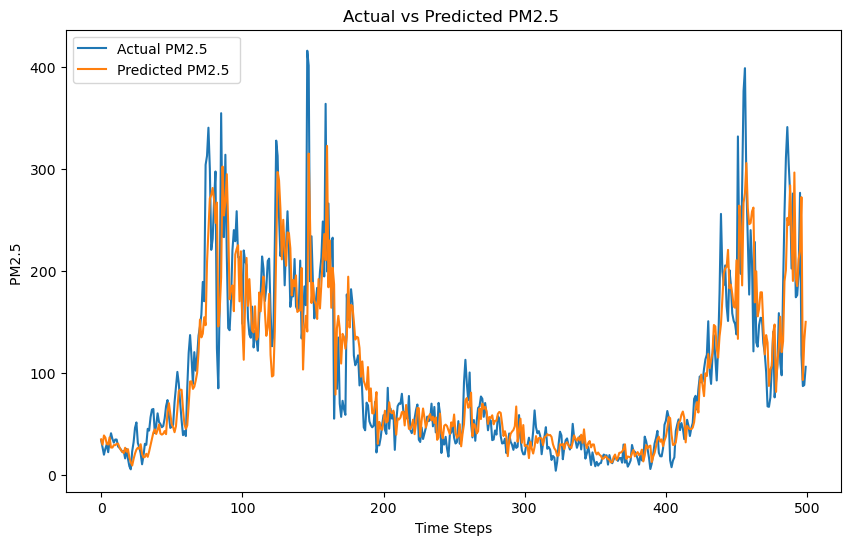

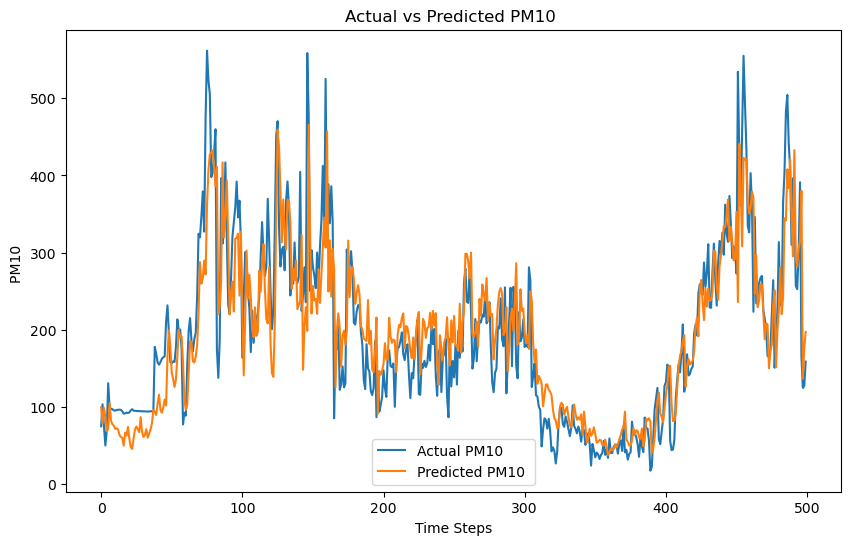

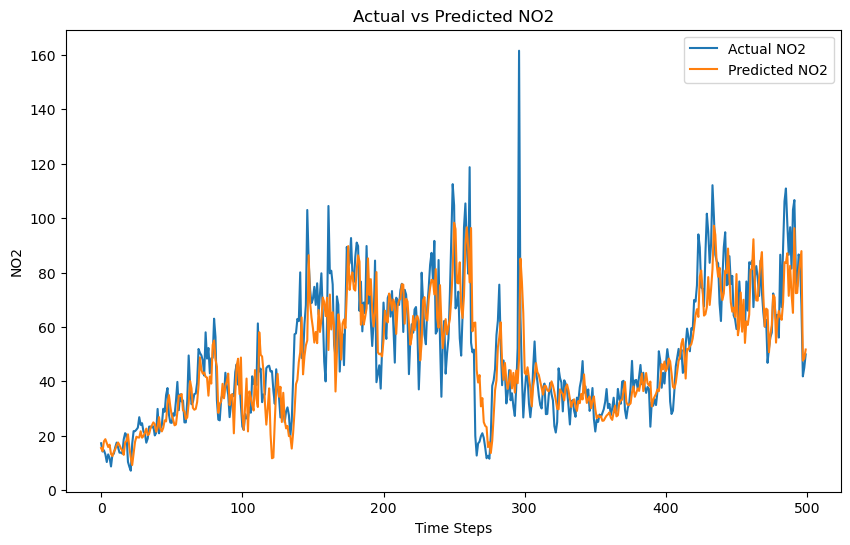

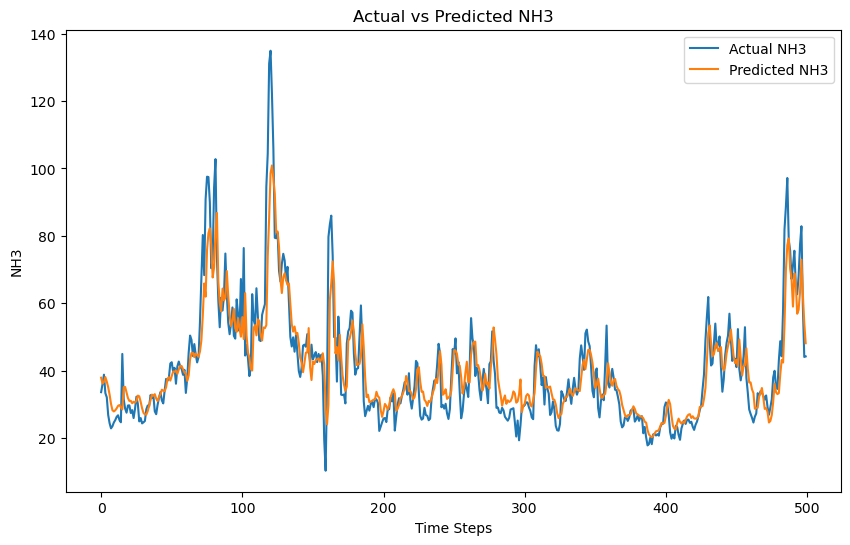

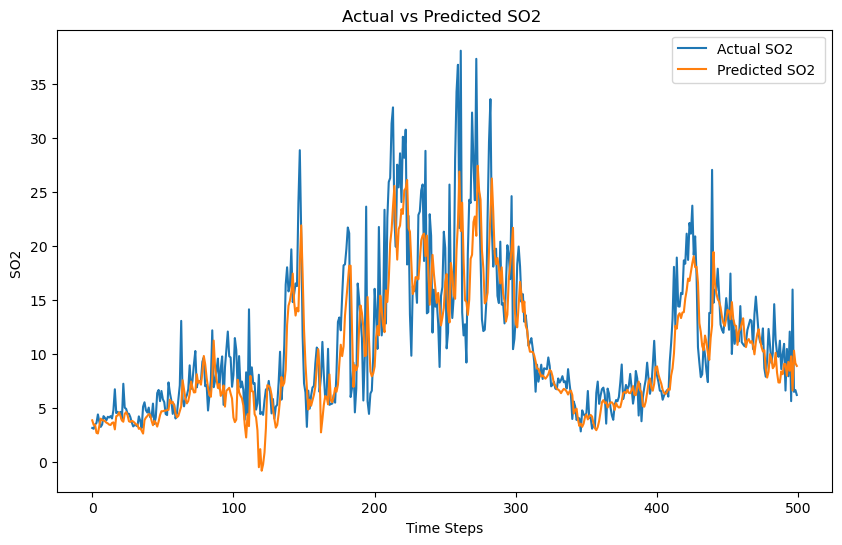

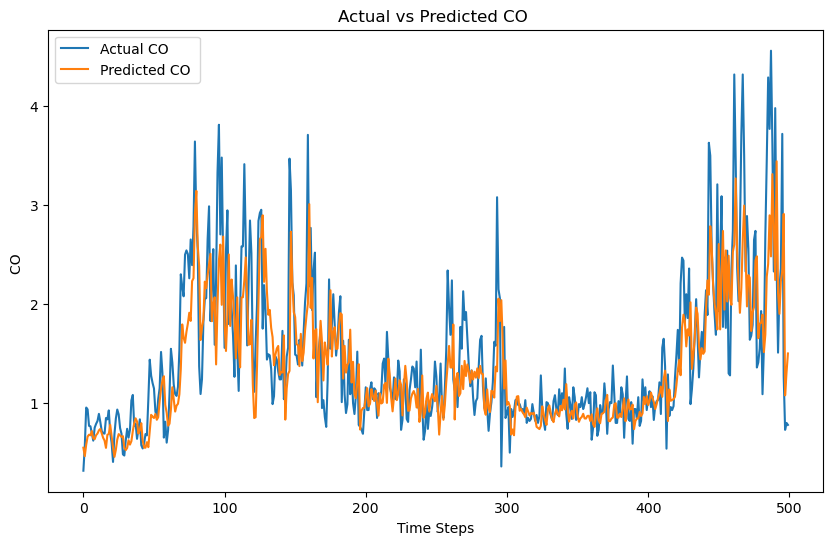

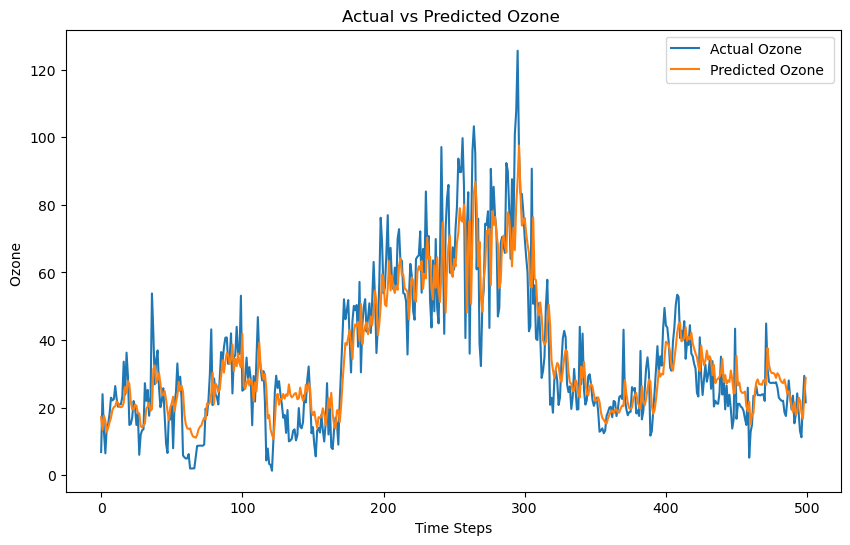

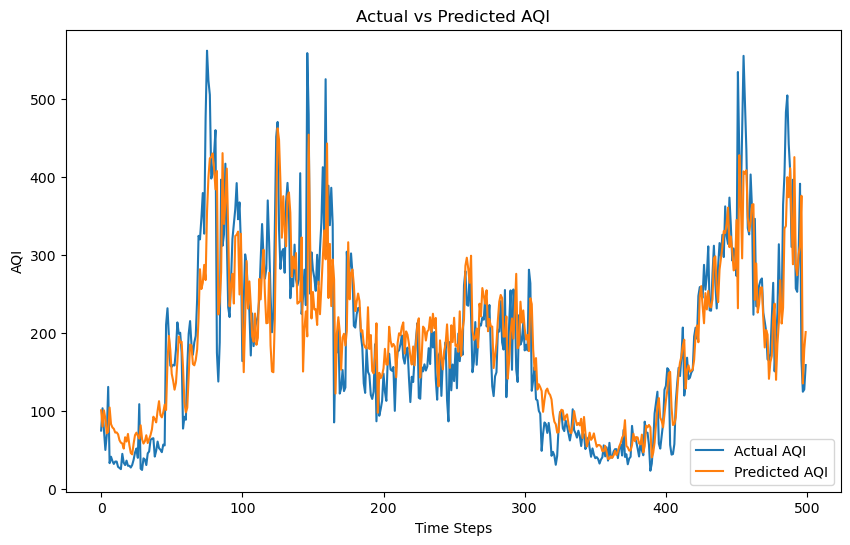

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


# Ensure Timestamp is handled properly if present
if 'Timestamp' in df.columns:
    df.drop('Timestamp', axis=1, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :])
        y.append(data[i+seq_length, :])
    return np.array(X), np.array(y)

# Create sequences
seq_length = 30  # Number of past days to consider
X, y = create_sequences(scaled_data, seq_length)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(y_train.shape[1]))  # Output layer for all parameters
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions_original = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test)

# Evaluate the model
print("Evaluation Metrics:")
for i, column in enumerate(df.columns):
    rmse = np.sqrt(mean_squared_error(y_test_original[:, i], predictions_original[:, i]))
    print(f"RMSE for {column}: {rmse}")

# Plot results for each parameter
for i, column in enumerate(df.columns):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_original[:, i], label=f'Actual {column}')
    plt.plot(predictions_original[:, i], label=f'Predicted {column}')
    plt.title(f'Actual vs Predicted {column}')
    plt.xlabel('Time Steps')
    plt.ylabel(column)
    plt.legend()
    plt.show()


In [16]:
from sklearn.metrics import mean_squared_error

# Inverse transform predictions and actual values
predictions_original = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test)

# Calculate RMSE and accuracy for each parameter
print("\nEvaluation Metrics:")
for i, column in enumerate(df.columns):
    rmse = np.sqrt(mean_squared_error(y_test_original[:, i], predictions_original[:, i]))
    mape = np.mean(np.abs((y_test_original[:, i] - predictions_original[:, i]) / y_test_original[:, i])) * 100
    accuracy = 100 - mape
    print(f"{column}: RMSE = {rmse:.2f}, Accuracy = {accuracy:.2f}%")



Evaluation Metrics:
PM2.5 : RMSE = 38.42, Accuracy = 66.36%
PM10 : RMSE = 58.94, Accuracy = 72.23%
NO2: RMSE = 13.12, Accuracy = 79.72%
NH3: RMSE = 8.06, Accuracy = 86.73%
SO2 : RMSE = 3.97, Accuracy = 76.03%
CO : RMSE = 0.50, Accuracy = 76.60%
Ozone : RMSE = 10.41, Accuracy = 61.76%
AQI: RMSE = 58.80, Accuracy = 69.04%


In [18]:
import numpy as np

# Number of days to predict (365 days for 1 year)
future_days = 365

# Start with the last sequence from the test data
last_sequence = X_test[-1]  # Shape: (seq_length, num_features)
predicted_values = []

for _ in range(future_days):
    # Add a batch dimension to the sequence for prediction
    next_pred = model.predict(last_sequence[np.newaxis, :, :])
    
    # Store the prediction
    predicted_values.append(next_pred[0])
    
    # Update the sequence: remove the oldest value and add the new prediction
    next_input = np.vstack([last_sequence[1:], next_pred])
    last_sequence = next_input

# Convert the predicted values to their original scale
predicted_values = np.array(predicted_values)
predicted_values_original = scaler.inverse_transform(predicted_values)

# Create a DataFrame for better visualization
import pandas as pd
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=future_days)
predicted_df = pd.DataFrame(predicted_values_original, columns=df.columns, index=future_dates)

# Save the predictions to a CSV file
predicted_df.to_csv('next_year_predictions.csv', index=True)
print("Predictions saved to 'next_year_predictions.csv'.")

# Display the first few rows of predictions
print(predicted_df.head())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━

TypeError: unsupported operand type(s) for +: 'int' and 'Timedelta'

                PM2.5        PM10          NO2        NH3       SO2   \
2025-12-01  150.266800  197.207108   51.697765  48.118275   8.898521   
2025-12-02  194.403549  258.408875   63.601017  51.847694   8.931416   
2025-12-03  217.302933  296.747162   68.465096  55.892605   8.994816   
2025-12-04  226.133331  314.453278   68.475250  57.999001   8.642800   
2025-12-05  227.092636  320.642731   66.147324  58.164833   7.985400   
...                ...         ...         ...        ...        ...   
2026-11-26 -365.008392  -25.540068 -206.370239  86.520477 -59.334091   
2026-11-27 -365.008362  -25.540127 -206.370239  86.520500 -59.334095   
2026-11-28 -365.008362  -25.540127 -206.370239  86.520493 -59.334091   
2026-11-29 -365.008362  -25.540134 -206.370209  86.520477 -59.334084   
2026-11-30 -365.008362  -25.540113 -206.370193  86.520477 -59.334084   

                 CO      Ozone          AQI  
2025-12-01  1.501764  28.779800  201.103302  
2025-12-02  1.927360  29.662737  261.438324

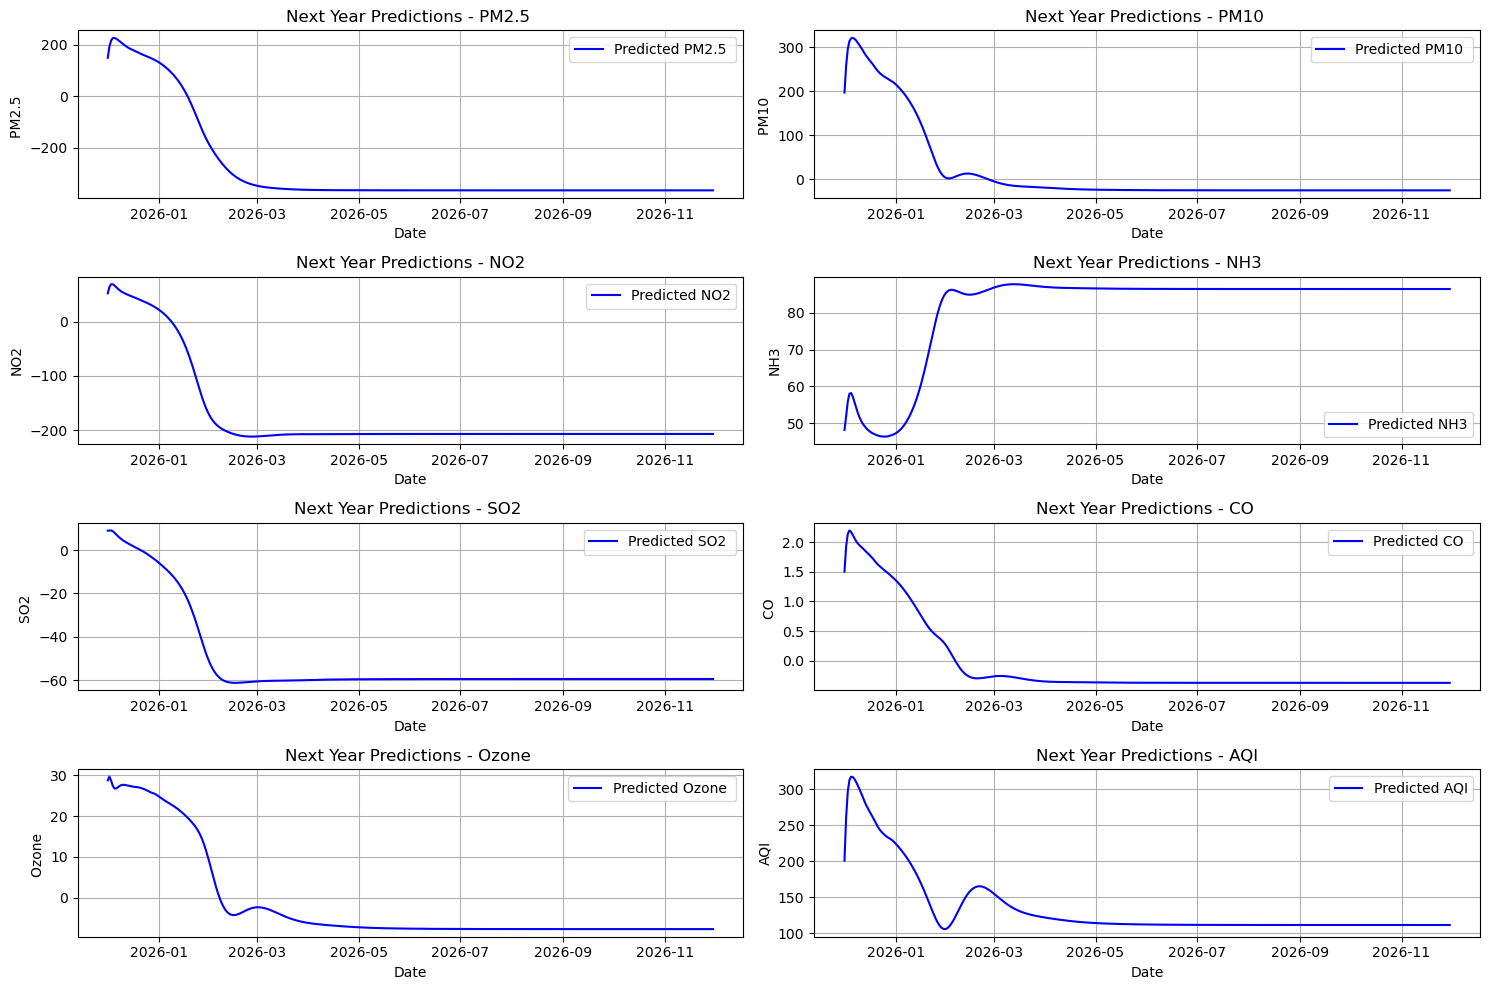

In [21]:
import pandas as pd
import numpy as np

# Ensure the index of the DataFrame is in DatetimeIndex format
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.date_range(start="2019-01-01", periods=len(df), freq="D")

# Generate future dates
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=future_days)

# Create a DataFrame for the predicted values
predicted_df = pd.DataFrame(predicted_values_original, columns=df.columns, index=future_dates)

# Save the predictions to a CSV file (optional)
predicted_df.to_csv("next_year_predictions.csv")

# Display the DataFrame (optional)
print(predicted_df)

# Plot predictions for each parameter
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns):
    plt.subplot(4, 2, i + 1)  # Create subplots (4 rows, 2 columns)
    plt.plot(predicted_df.index, predicted_df[column], label=f'Predicted {column}', color='blue')
    plt.title(f'Next Year Predictions - {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid()
    plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
